In [1]:
'''
My Attempt at the Raw Sequence Embedding CNN-LSTM at:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5747425/pdf/pone.0188129.pdf
Works by embedding sequence as a vector prior to 2-layer CNN and LSTM
'''

'\nMy Attempt at the Raw Sequence Embedding CNN-LSTM at:\nhttps://www.ncbi.nlm.nih.gov/pmc/articles/PMC5747425/pdf/pone.0188129.pdf\nWorks by embedding sequence as a vector prior to 2-layer CNN and LSTM\n'

In [1]:
from keras.layers import Conv2D, BatchNormalization, AveragePooling2D, Dense, Dropout, Activation, AveragePooling1D, Reshape, Bidirectional, GlobalMaxPooling1D
from keras.layers import Input, Concatenate, Flatten, Embedding, CuDNNLSTM, Conv1D, MaxPooling1D, LSTM, TimeDistributed, MaxPooling2D, GaussianNoise, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, CSVLogger, LearningRateScheduler
from keras import backend as K
import numpy as np
from keras.utils import to_categorical
import os

c:\users\wolfgang\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [53]:
K.clear_session()
del model

In [5]:
# Basic 1D Conv CNN LSTM

start_target_size = (672)
batch_size = 16
x_train = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/x_train.npy')
y_train = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/y_train.npy')


# model
inputs = Input(shape=[start_target_size])
x = Embedding(input_dim = 5, output_dim=16, mask_zero=False, input_length=start_target_size)(inputs)
x = Conv1D(64, kernel_size=16, strides=1, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=8, strides=8)(x)
x = Bidirectional(CuDNNLSTM(256, return_sequences=True))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs = predictions)
model.compile(loss='binary_crossentropy',
              optimizer= SGD(lr=0.001, momentum=0.9),
              metrics=['binary_accuracy'])
model.summary()


root_path = 'D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights'

save_model = ModelCheckpoint(os.path.join(root_path, 'weights-{epoch:02d}-{val_loss:.2f}.hdf5'),
                                             monitor='val_loss',
                                             verbose=1, 
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto',
                                             period=1)

csv_path = os.path.join(root_path, 'training_history.csv')
csv_logger = CSVLogger(csv_path, separator=',', append=False)



model.fit(x_train,
          y_train,
          batch_size=16, 
          epochs=30,
          shuffle=True,
          verbose=2, 
          validation_split=0.1,
          callbacks = [save_model, csv_logger])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 672)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 672, 16)           80        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 672, 64)           16448     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 84, 64)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 84, 512)           659456    
_________________________________________________________________
flatten_3 (Flatten)          (None, 43008)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              44041216  
__________

In [7]:
# Basic 1D Conv CNN LSTM

start_target_size = (672)
batch_size = 16
x_train = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/x_train.npy')
y_train = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/y_train.npy')


# model
inputs = Input(shape=[start_target_size])
x = Embedding(input_dim = 5, output_dim=16, mask_zero=False, input_length=start_target_size)(inputs)
x = Conv1D(64, kernel_size=16, strides=1, padding='same', activation='relu')(x)
x2 = Conv1D(64, kernel_size=16, strides=1, padding='same', activation='relu')(x)
x = Concatenate()([x, x2])
x = MaxPooling1D(pool_size=4, strides=4)(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs = predictions)
model.compile(loss='binary_crossentropy',
              optimizer= SGD(lr=0.001, momentum=0.9),
              metrics=['binary_accuracy'])
model.summary()


root_path = 'D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights'

save_model = ModelCheckpoint(os.path.join(root_path, 'weights-{epoch:02d}-{val_loss:.2f}.hdf5'),
                                             monitor='val_loss',
                                             verbose=1, 
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto',
                                             period=1)

csv_path = os.path.join(root_path, 'training_history.csv')
csv_logger = CSVLogger(csv_path, separator=',', append=False)



model.fit(x_train,
          y_train,
          batch_size=16, 
          epochs=30,
          shuffle=True,
          verbose=2, 
          validation_split=0.1,
          callbacks = [save_model, csv_logger])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 672)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 672, 16)      80          input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 672, 64)      16448       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 672, 64)      65600       conv1d_6[0][0]                   
__________________________________________________________________________________________________
concatenat

Epoch 27/30

Epoch 00027: val_loss did not improve
 - 55s - loss: 0.4780 - binary_accuracy: 0.7551 - val_loss: 0.5227 - val_binary_accuracy: 0.7334
Epoch 28/30

Epoch 00028: val_loss did not improve
 - 55s - loss: 0.4753 - binary_accuracy: 0.7592 - val_loss: 0.5245 - val_binary_accuracy: 0.7345
Epoch 29/30

Epoch 00029: val_loss did not improve
 - 55s - loss: 0.4737 - binary_accuracy: 0.7598 - val_loss: 0.5220 - val_binary_accuracy: 0.7264
Epoch 30/30

Epoch 00030: val_loss did not improve
 - 55s - loss: 0.4719 - binary_accuracy: 0.7587 - val_loss: 0.5201 - val_binary_accuracy: 0.7383


In [9]:
# Basic 1D Conv CNN LSTM

start_target_size = (672)
batch_size = 16
x_train = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/x_train.npy')
y_train = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/y_train.npy')


# model
inputs = Input(shape=[start_target_size])
x = Embedding(input_dim = 5, output_dim=16, mask_zero=False, input_length=start_target_size)(inputs)
x = Conv1D(64, kernel_size=16, strides=1, padding='same', activation='relu')(x)
x2 = Conv1D(64, kernel_size=16, strides=1, padding='same', activation='relu')(x)
x = Concatenate()([x, x2])
x = MaxPooling1D(pool_size=8, strides=8)(x)
x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs = predictions)
model.compile(loss='binary_crossentropy',
              optimizer= SGD(lr=0.001, momentum=0.9),
              metrics=['binary_accuracy'])
model.summary()


root_path = 'D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights'

save_model = ModelCheckpoint(os.path.join(root_path, 'weights-{epoch:02d}-{val_loss:.2f}.hdf5'),
                                             monitor='val_loss',
                                             verbose=1, 
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto',
                                             period=1)

csv_path = os.path.join(root_path, 'training_history.csv')
csv_logger = CSVLogger(csv_path, separator=',', append=False)



model.fit(x_train,
          y_train,
          batch_size=16, 
          epochs=30,
          shuffle=True,
          verbose=2, 
          validation_split=0.1,
          callbacks = [save_model, csv_logger])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 672)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 672, 16)      80          input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 672, 64)      16448       embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 672, 64)      65600       conv1d_9[0][0]                   
__________________________________________________________________________________________________
concatenat

Epoch 26/30

Epoch 00026: val_loss did not improve
 - 33s - loss: 0.4838 - binary_accuracy: 0.7531 - val_loss: 0.5189 - val_binary_accuracy: 0.7318
Epoch 27/30

Epoch 00027: val_loss improved from 0.51464 to 0.51397, saving model to D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights\weights-27-0.51.hdf5
 - 35s - loss: 0.4817 - binary_accuracy: 0.7546 - val_loss: 0.5140 - val_binary_accuracy: 0.7281
Epoch 28/30

Epoch 00028: val_loss improved from 0.51397 to 0.51001, saving model to D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights\weights-28-0.51.hdf5
 - 35s - loss: 0.4780 - binary_accuracy: 0.7552 - val_loss: 0.5100 - val_binary_accuracy: 0.7464
Epoch 29/30

Epoch 00029: val_loss did not improve
 - 33s - loss: 0.4790 - binary_accuracy: 0.7536 - val_loss: 0.5161 - val_binary_accuracy: 0.7394
Epoch 30/30

Epoch 00030: val_loss did not improve
 - 33s - loss: 0.4761 - binary_accuracy: 0.7581 - val_loss: 0.5398 - val_binary_accuracy: 0.7027


In [10]:
# Basic 1D Conv CNN LSTM

start_target_size = (672)
batch_size = 16
x_train = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/x_train.npy')
y_train = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/y_train.npy')


# model
inputs = Input(shape=[start_target_size])
x = Embedding(input_dim = 5, output_dim=16, mask_zero=False, input_length=start_target_size)(inputs)
x = Conv1D(64, kernel_size=16, strides=1, padding='same', activation='relu')(x)
x2 = Conv1D(64, kernel_size=16, strides=1, padding='same', activation='relu')(x)
x = Concatenate()([x, x2])
x = MaxPooling1D(pool_size=16, strides=16)(x)
x = Bidirectional(CuDNNLSTM(64, return_sequences=True))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs = predictions)
model.compile(loss='binary_crossentropy',
              optimizer= SGD(lr=0.001, momentum=0.9),
              metrics=['binary_accuracy'])
model.summary()


root_path = 'D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights'

save_model = ModelCheckpoint(os.path.join(root_path, 'weights-{epoch:02d}-{val_loss:.2f}.hdf5'),
                                             monitor='val_loss',
                                             verbose=1, 
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto',
                                             period=1)

csv_path = os.path.join(root_path, 'training_history.csv')
csv_logger = CSVLogger(csv_path, separator=',', append=False)



model.fit(x_train,
          y_train,
          batch_size=16, 
          epochs=30,
          shuffle=True,
          verbose=2, 
          validation_split=0.1,
          callbacks = [save_model, csv_logger])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 672)          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 672, 16)      80          input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 672, 64)      16448       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 672, 64)      65600       conv1d_11[0][0]                  
__________________________________________________________________________________________________
concatenat

Epoch 28/30

Epoch 00028: val_loss improved from 0.51423 to 0.51230, saving model to D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights\weights-28-0.51.hdf5
 - 18s - loss: 0.4817 - binary_accuracy: 0.7572 - val_loss: 0.5123 - val_binary_accuracy: 0.7372
Epoch 29/30

Epoch 00029: val_loss did not improve
 - 18s - loss: 0.4810 - binary_accuracy: 0.7553 - val_loss: 0.5156 - val_binary_accuracy: 0.7189
Epoch 30/30

Epoch 00030: val_loss improved from 0.51230 to 0.50885, saving model to D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights\weights-30-0.51.hdf5
 - 18s - loss: 0.4797 - binary_accuracy: 0.7563 - val_loss: 0.5088 - val_binary_accuracy: 0.7383


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [13]:
x_test = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/x_test.npy')
y_test = np.load('D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/y_test.npy')

model_list = ['D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights\weights-29-0.52.hdf5',
              'D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights/weights-26-0.51.hdf5',
              'D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights/weights-28-0.51.hdf5',
              'D:/Projects/iSynPro/iSynPro/EmbeddedSeqCNNLSTM/weights\weights-30-0.51.hdf5'
              ]
label_list = ['Vanilla Embedded CNN-LSTM', 
              'Dual-Conv Embedded HalfPool CNN-LSTM',
              'Dual-Conv Embedded CNN-LSTM',
              'Dual-Conv Embedded DoublePool CNN-LSTM'
              ]
roc_list = []
for path in model_list:
    model = load_model(path)
    y_pred = model.predict(x_test)
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_list.append([fpr, tpr, auc])
    K.clear_session()
    del model

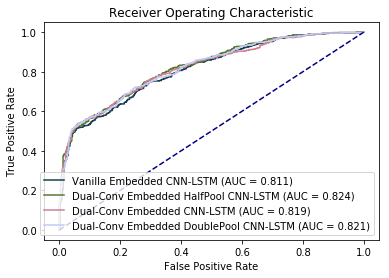

In [14]:
palette = sns.color_palette("cubehelix", len(roc_list))

#plot roc curve
for i in range(len(roc_list)):
    plt.plot(roc_list[i][0], 
             roc_list[i][1], 
             color=palette[i], 
             label='{0} (AUC = {1:.3f})'.format(label_list[i], roc_list[i][2]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig('c:/users/wolf/desktop/SynPro/roc.png')
plt.show()